In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [20]:
ds = pd.read_csv('/content/cirrhosis.csv')
print(ds.shape)

(418, 20)


In [3]:
# Handle missing values by replacing with mean only for numeric columns
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
ds[numeric_columns] = ds[numeric_columns].fillna(ds[numeric_columns].mean())

# Verify there are no missing values left
print("\nMissing values in each column after handling:")
print(ds.isnull().sum())

# Display the first few rows of the dataset after handling missing values
print("\nDataset after imputing missing values with mean:")
print(ds.head())


Missing values in each column after handling:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

Dataset after imputing missing values with mean:
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N         

                     ID    N_Days       Age  Bilirubin  Cholesterol   Albumin  \
ID             1.000000 -0.354305  0.037136  -0.062154     0.020507 -0.128924   
N_Days        -0.354305  1.000000 -0.125934  -0.403953    -0.114683  0.430829   
Age            0.037136 -0.125934  1.000000   0.002362    -0.130578 -0.182350   
Bilirubin     -0.062154 -0.403953  0.002362   1.000000     0.337809 -0.314177   
Cholesterol    0.020507 -0.114683 -0.130578   0.337809     1.000000 -0.054572   
Albumin       -0.128924  0.430829 -0.182350  -0.314177    -0.054572  1.000000   
Copper        -0.063529 -0.319775  0.053617   0.405228     0.123024 -0.225532   
Alk_Phos      -0.227543  0.131080 -0.041326   0.103842     0.140112 -0.086570   
SGOT          -0.007801 -0.198015 -0.131087   0.392107     0.337282 -0.187761   
Tryglicerides -0.021199 -0.126912  0.018278   0.371490     0.276828 -0.080804   
Platelets     -0.075573  0.147495 -0.145948  -0.013347     0.150683  0.156384   
Prothrombin   -0.191176 -0.1

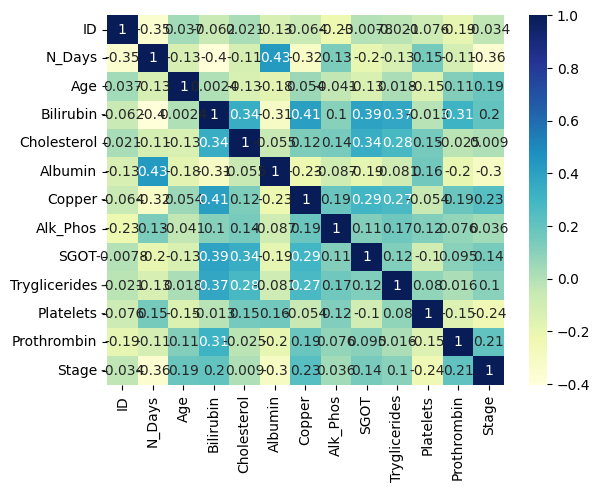

In [4]:
corr_mat = ds.corr(numeric_only=True)
print(corr_mat)
dataplot = sb.heatmap(ds.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [5]:
x=ds.loc[:,["ID","N_Days","Age","Bilirubin","Albumin"]].values
y=ds.loc[:,"Edema"].values
print(x)
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
print(x_train.size,y_train.size,x_test.size,y_test.size)
print("\nx_train",x_train)
print("\ny_train",y_train)
print("\nx_test",x_test)
print("\ny_test",y_test)

[[1.0000e+00 4.0000e+02 2.1464e+04 1.4500e+01 2.6000e+00]
 [2.0000e+00 4.5000e+03 2.0617e+04 1.1000e+00 4.1400e+00]
 [3.0000e+00 1.0120e+03 2.5594e+04 1.4000e+00 3.4800e+00]
 ...
 [4.1600e+02 1.0550e+03 2.0819e+04 1.6000e+00 3.4200e+00]
 [4.1700e+02 6.9100e+02 2.1185e+04 8.0000e-01 3.7500e+00]
 [4.1800e+02 9.7600e+02 1.9358e+04 7.0000e-01 3.2900e+00]]
['Y' 'N' 'S' 'S' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y'
 'S' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'S' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N'
 'N' 'N' 'S' 'S' 'S' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'S' 'N' 'N'
 'S' 'Y' 'N' 'N' 'Y' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S'
 'N' 'S' 'S' 'N' 'S' 'N' 'N' 'N' 'N' 'Y' 'S' 'N' 'N' 'N' 'N' '

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [7]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean',
p=5)#KNN algorithm
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [8]:
from sklearn.svm import SVC
classifier1 = SVC(kernel='linear',random_state=10)#SVm algorithm
classifier1.fit(x_train,y_train)
y_pred1 = classifier1.predict(x_test)
print(y_pred1)

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [9]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
print(y_pred_nb)

['N' 'N' 'Y' 'N' 'N' 'S' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'S' 'S' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [10]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train, y_train)
y_pred_lr = lr_classifier.predict(x_test)
print(y_pred_lr)

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)
print(y_pred_dt)

['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'S' 'S' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'S' 'S' 'S' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'S' 'N' 'N' 'N' 'S' 'N' 'N']


In [12]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[66  2  0]
 [ 9  0  2]
 [ 4  0  1]]


In [13]:
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)

[[68  0  0]
 [ 9  0  2]
 [ 3  0  2]]


In [14]:
cm2 = confusion_matrix(y_test,y_pred_nb)
print(cm2)

[[61  4  3]
 [ 8  1  2]
 [ 2  0  3]]


In [15]:
cm3 = confusion_matrix(y_test,y_pred_lr)
print(cm3)

[[68  0  0]
 [ 9  0  2]
 [ 2  0  3]]


In [16]:
cm4 = confusion_matrix(y_test,y_pred_dt)
print(cm4)

[[60  7  1]
 [ 8  2  1]
 [ 1  2  2]]


In [17]:
print("train accuracy KNN:",classifier.score(x_train,y_train))
print("test accuracy KNN:",classifier.score(x_test,y_test))

train accuracy KNN: 0.8862275449101796
test accuracy KNN: 0.7976190476190477


In [ ]:
print("train accuracy svm:",classifier1.score(x_train,y_train))
print("test accuracy svm:",classifier1.score(x_test,y_test))

train accuracy svm: 0.8862275449101796
test accuracy svm: 0.8333333333333334


In [ ]:
print("train accuracy of Naive Bayes:",nb_classifier.score(x_train,y_train))
print("test accuracy of Naive Bayes:",nb_classifier.score(x_test,y_test))

train accuracy of Naive Bayes: 0.8473053892215568
test accuracy of Naive Bayes: 0.7738095238095238


In [ ]:
print("train accuracy of Logistic Regression:",lr_classifier.score(x_train,y_train))
print("test accuracy of Logistic Regression:",lr_classifier.score(x_test,y_test))

train accuracy of Logistic Regression: 0.8862275449101796
test accuracy of Logistic Regression: 0.8452380952380952


In [ ]:
print("train accuracy of Decision Tree:",dt_classifier.score(x_train,y_train))
print("test accuracy of Decision Tree:",dt_classifier.score(x_test,y_test))

train accuracy of Decision Tree: 1.0
test accuracy of Decision Tree: 0.7619047619047619


In [ ]:
a=accuracy_score(y_test,y_pred)*100
print("Misclassification : \n",1-accuracy_score(y_test,y_pred))
p=precision_score(y_test, y_pred,average='weighted')*100
f=f1_score(y_test,y_pred,average='weighted')*100
r=recall_score(y_test, y_pred,average='weighted')*100

Misclassification : 
 0.20238095238095233


In [ ]:
a1=accuracy_score(y_test,y_pred1)*100
print("Misclassification : \n",1-accuracy_score(y_test,y_pred1))
p1=precision_score(y_test, y_pred1,average='weighted')*100
f1=f1_score(y_test,y_pred1,average='weighted')*100
r1=recall_score(y_test, y_pred1,average='weighted')*100

Misclassification : 
 0.16666666666666663


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
a2=accuracy_score(y_test,y_pred_nb)*100
print("Misclassification : \n",1-accuracy_score(y_test,y_pred_nb))
p2=precision_score(y_test, y_pred_nb,average='weighted')*100
f2=f1_score(y_test,y_pred_nb,average='weighted')*100
r2=recall_score(y_test, y_pred_nb,average='weighted')*100

Misclassification : 
 0.22619047619047616


In [ ]:
a3=accuracy_score(y_test,y_pred_nb)*100
print("Misclassification : \n",1-accuracy_score(y_test,y_pred_lr))
p3=precision_score(y_test, y_pred_lr,average='weighted')*100
f3=f1_score(y_test,y_pred_lr,average='weighted')*100
r3=recall_score(y_test, y_pred_lr,average='weighted')*100

Misclassification : 
 0.15476190476190477


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
a4=accuracy_score(y_test,y_pred_dt)*100
print("Misclassification : \n",1-accuracy_score(y_test,y_pred_dt))
p4=precision_score(y_test, y_pred_dt,average='weighted')*100
f4=f1_score(y_test,y_pred_dt,average='weighted')*100
r4=recall_score(y_test, y_pred_dt,average='weighted')*100

Misclassification : 
 0.23809523809523814


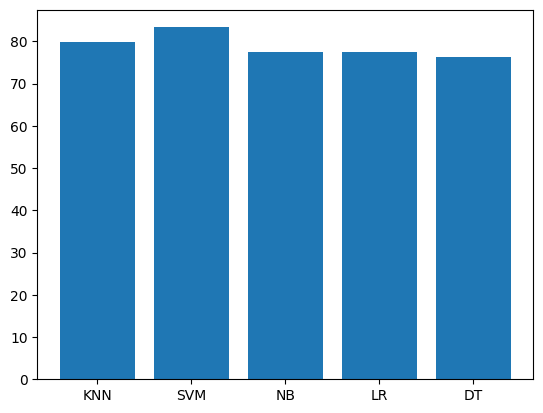

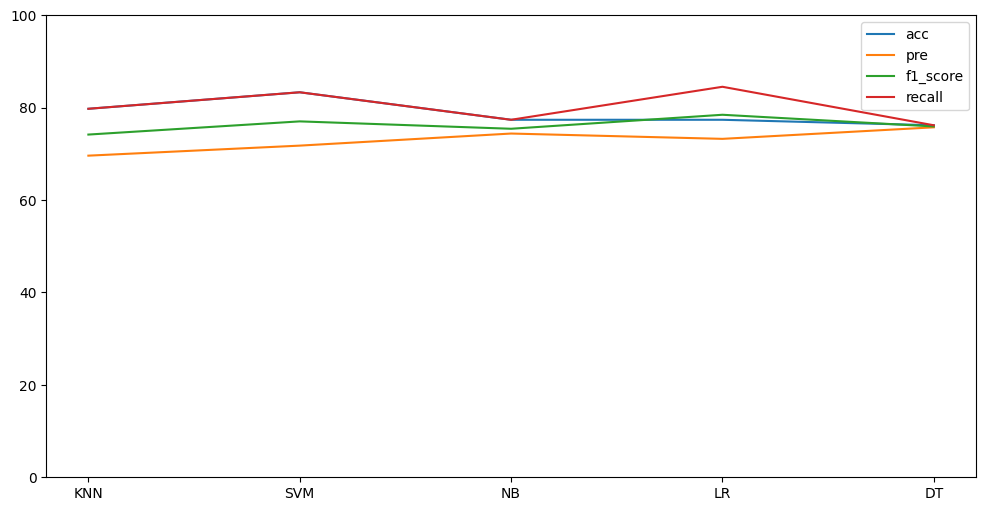

In [ ]:
x_labels = ['KNN', 'SVM', 'NB', 'LR', 'DT']
y_values = [a, a1, a2, a3, a4]
x_range = range(len(y_values))# Setting range for the x-axis
fig, ax = plt.subplots()# Create the figure and the subplot
ax.bar(x_range, y_values)
ax.set_xticks(x_range)
ax.set_xticklabels(x_labels)
plt.show()
# prints the accuracy scores of all algorithms in a single bar graph
x_labels = ['KNN', 'SVM', 'NB', 'LR', 'DT']
y_values_1 = [a,a1,a2,a3,a4]
y_values_2 = [p,p1,p2,p3,p4]
y_values_3 = [f,f1,f2,f3,f4]
y_values_4 = [r,r1,r2,r3,r4]
x = np.arange(0, 10, 100)
fig, ax = plt.subplots(figsize=(12,6))
plt.ylim(0,100)
ax.plot(x_labels, y_values_1, label='acc')
ax.plot(x_labels, y_values_2, label='pre')
ax.plot(x_labels, y_values_3, label='f1_score')
ax.plot(x_labels, y_values_4, label='recall')
ax.legend()
plt.show()